In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] + 3 + np.random.normal(0.,5.,size = 100)

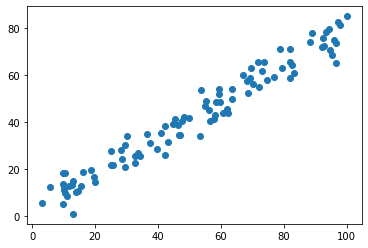

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1 )
pca.fit(X)
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

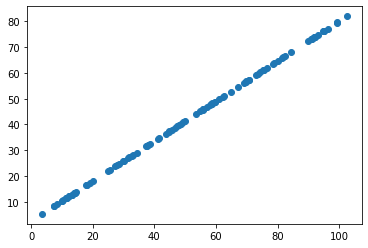

In [7]:
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()

### 手写识别例子

In [9]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data 
y = digits.target

In [11]:
noisy_digits = X + np.random.normal(0, 4, size = X.shape)

In [12]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    example_digits = np.vstack([example_digits, X_num])

In [14]:
example_digits.shape

(100, 64)

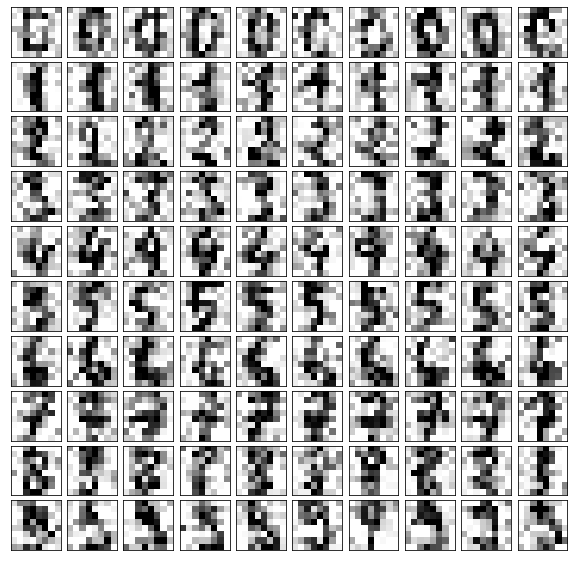

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10,10),
                            subplot_kw = {'xticks':[], 'yticks':[]},
                            gridspec_kw = dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
    plt.show()

plot_digits(example_digits)

In [19]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(n_components=0.5)

In [21]:
pca.n_components_

12

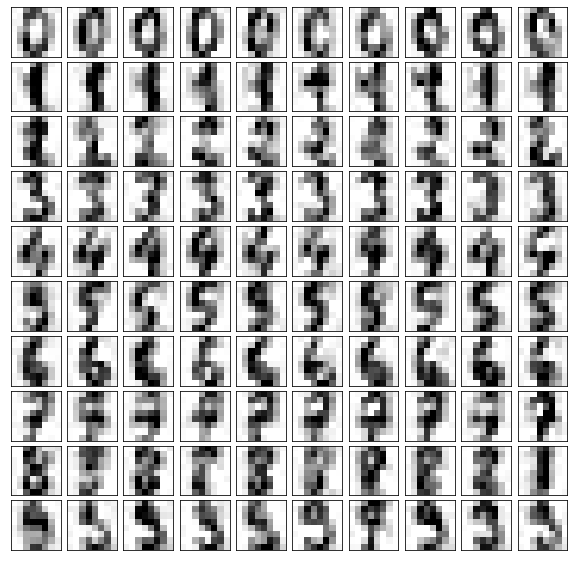

In [22]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)